In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [3]:
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
datadir = 'ocean_monthly_z/ts/monthly/5yr/'
filename = 'ocean_monthly_z.071101-071512.thetao.nc'

temperature = xr.open_dataset(rootdir+datadir+filename)
print(temperature.thetao)

<xarray.DataArray 'thetao' (time: 60, z_l: 35, yh: 576, xh: 720)>
[870912000 values with dtype=float32]
Coordinates:
  * time     (time) object 0711-01-16 12:00:00 ... 0715-12-16 12:00:00
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:      Sea Water Potential Temperature
    units:          degC
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    cell_measures:  volume: volcello area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_temperature


/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


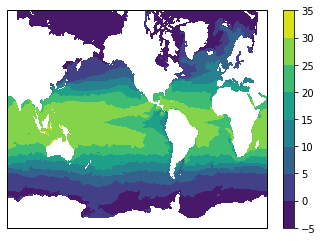

In [4]:
import cartopy.crs as ccrs


ax = plt.axes(projection=ccrs.Mercator(central_longitude=0.0,min_latitude=-80.0,max_latitude=84.0,globe=None,latitude_true_scale=0.0))

plt.contourf(temperature.thetao.isel(time=0,z_l=3))
plt.colorbar()

ax.coastlines()


ValueError: num must be 1 <= num <= 24, not 25

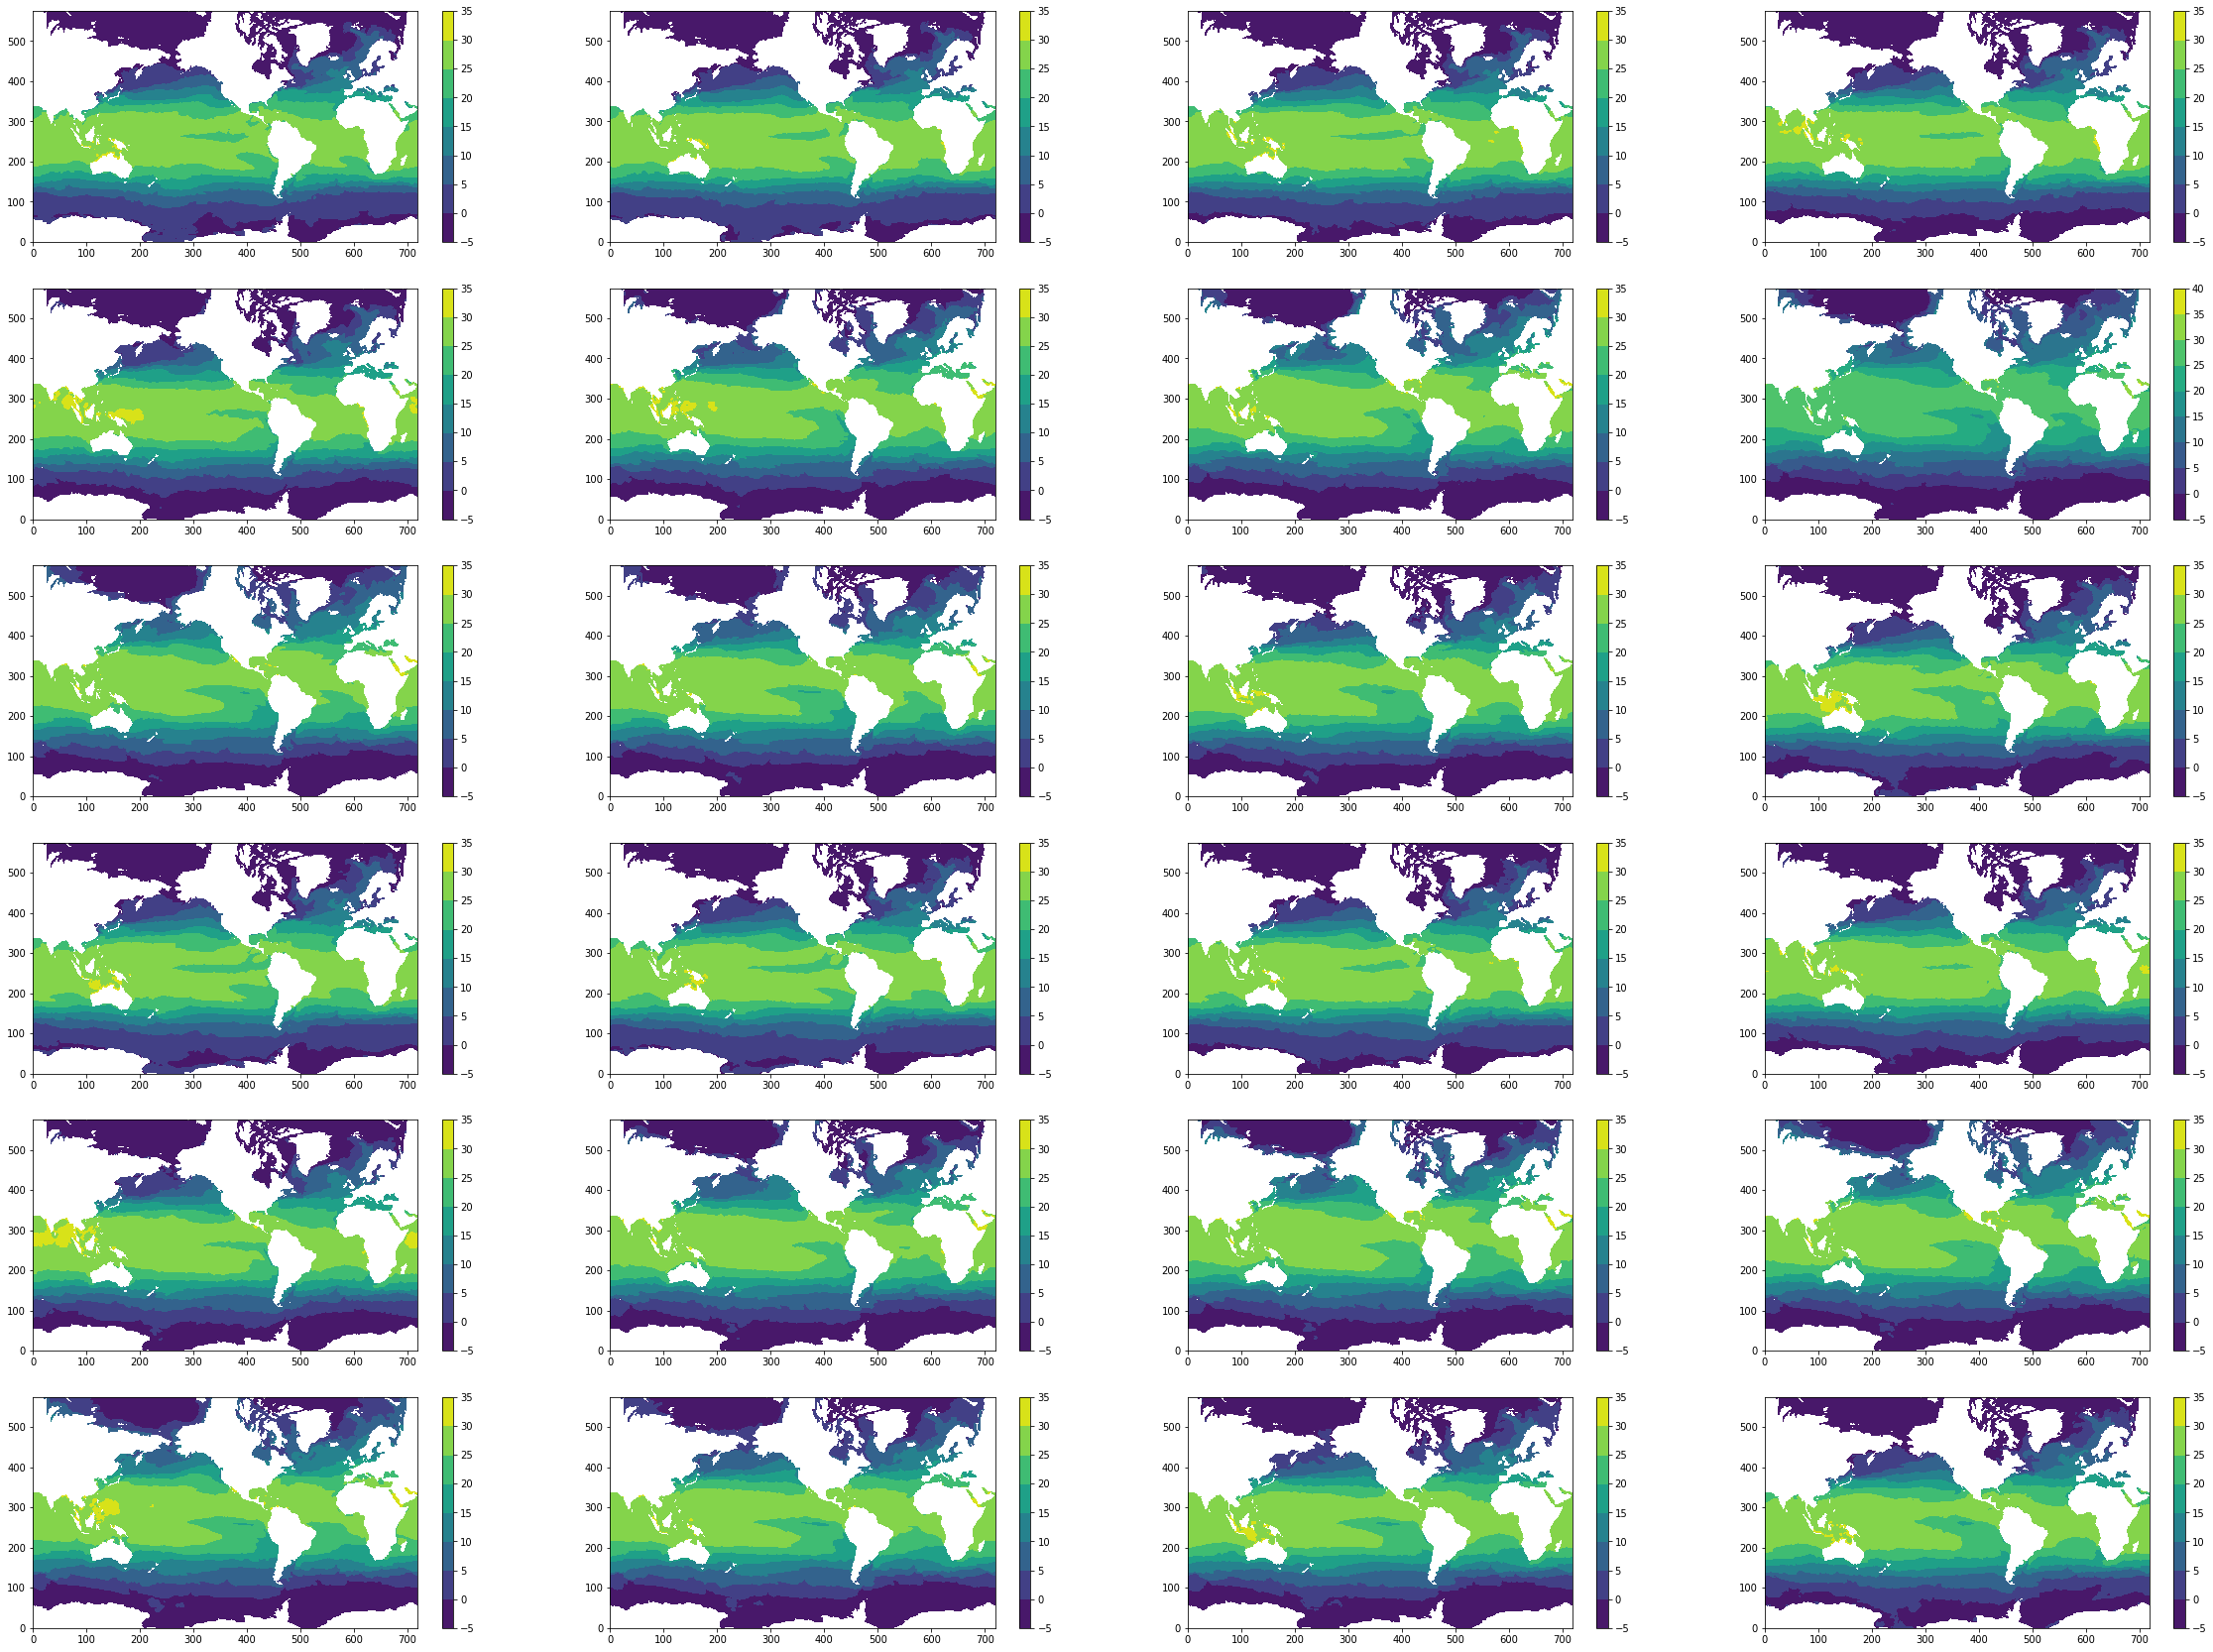

In [8]:
plt.figure(figsize=(40,30))
#Range for z is alternating depths from 0 to 6 (surface level to depth 7) 
alternating_depths = [0, 2, 4, 6]
for z in range(len('alternating_depths')):
    January_March_May_July_September_November = [0, 2, 4, 6, 8, 10]
    for t in range(len('January-March-May-July-September-November')):
        n = t*1+z
        plt.subplot(6,4,n+1)
        plt.contourf(temperature.thetao.isel(time=t,z_l=z))
        plt.colorbar()